### Group by groups together rows based on a column 
### Post GROUP By, we can perform aggregate functions like sum, avg etc

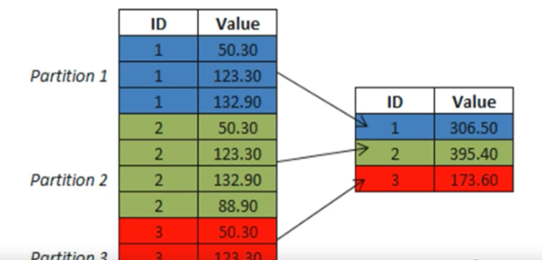

In [1]:
import numpy as np
import pandas as pd

In [2]:
sales_data = {'Company':['GooG','GooG','MSFT','MSFT','FB','FB'],
       'Person': ['John Smith','Jane Doe','Amy','Andy','Charlie','Karla'],
       'Sales': [200,400,600,1000,1200,10000]}

In [3]:
df = pd.DataFrame(data=sales_data)

In [4]:
df

Company      Person  Sales
0    GooG  John Smith    200
1    GooG    Jane Doe    400
2    MSFT         Amy    600
3    MSFT        Andy   1000
4      FB     Charlie   1200
5      FB       Karla  10000

In [8]:
#### using Group By Method. 
### group by company column

grpbycomp = df.groupby('Company')
print(type(grpbycomp))

### note that the output is a group by object

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


In [6]:
### mean of sales by company
grpbycomp.mean()

### for eg mean sales of facebook is (1200+10000)/2) = 5600 
### outputs a data frame with index called company and sales
### this allows us to further process the data


Sales
Company       
FB        5600
GooG       300
MSFT       800

In [9]:
grpbycomp.sum()

Sales
Company       
FB       11200
GooG       600
MSFT      1600

In [10]:
#### to get the overall sales of facebook
grpbycomp.sum().loc['FB']

Sales    11200
Name: FB, dtype: int64

In [11]:
#### to get the overall sales of Google
grpbycomp.sum().loc['GooG']

Sales    600
Name: GooG, dtype: int64

In [12]:
### other ways of writing expression with groupby
#### groupby (column). aggregatefunction
df.groupby('Company').sum().loc['FB']

Sales    11200
Name: FB, dtype: int64

In [16]:
df.groupby('Company').sum().loc['GooG']

Sales    600
Name: GooG, dtype: int64

In [17]:
df

Company      Person  Sales
0    GooG  John Smith    200
1    GooG    Jane Doe    400
2    MSFT         Amy    600
3    MSFT        Andy   1000
4      FB     Charlie   1200
5      FB       Karla  10000

In [18]:
### to count the number of persons in each company

df.groupby('Company').count()

Person  Sales
Company               
FB            2      2
GooG          2      2
MSFT          2      2

In [20]:
### Max operation

df.groupby('Company').max()

Person  Sales
Company                   
FB            Karla  10000
GooG     John Smith    400
MSFT           Andy   1000

In [21]:
df.groupby('Company').min()

Person  Sales
Company                 
FB        Charlie   1200
GooG     Jane Doe    200
MSFT          Amy    600

In [22]:
#### group by with describe method, gives min,max, mean , count, std deviation, \
### 1st quartile, 2nd quartile, 3rd quartile.

df.groupby('Company').describe()

Sales                                                              
        count    mean          std     min     25%     50%     75%      max
Company                                                                    
FB        2.0  5600.0  6222.539674  1200.0  3400.0  5600.0  7800.0  10000.0
GooG      2.0   300.0   141.421356   200.0   250.0   300.0   350.0    400.0
MSFT      2.0   800.0   282.842712   600.0   700.0   800.0   900.0   1000.0

In [23]:
#### use transpose method on describe method output to transpose rows and columns
df.groupby('Company').describe().transpose()

Company                FB        GooG         MSFT
Sales count      2.000000    2.000000     2.000000
      mean    5600.000000  300.000000   800.000000
      std     6222.539674  141.421356   282.842712
      min     1200.000000  200.000000   600.000000
      25%     3400.000000  250.000000   700.000000
      50%     5600.000000  300.000000   800.000000
      75%     7800.000000  350.000000   900.000000
      max    10000.000000  400.000000  1000.000000

In [24]:
df.groupby('Company').describe().transpose()['FB']

Sales  count        2.000000
       mean      5600.000000
       std       6222.539674
       min       1200.000000
       25%       3400.000000
       50%       5600.000000
       75%       7800.000000
       max      10000.000000
Name: FB, dtype: float64

In [25]:
### df.groupby('Company').describe().transpose()['FB']
df.groupby('Company').describe().transpose()[['FB','GooG']]

Company                FB        GooG
Sales count      2.000000    2.000000
      mean    5600.000000  300.000000
      std     6222.539674  141.421356
      min     1200.000000  200.000000
      25%     3400.000000  250.000000
      50%     5600.000000  300.000000
      75%     7800.000000  350.000000
      max    10000.000000  400.000000

In [26]:
df

Company      Person  Sales
0    GooG  John Smith    200
1    GooG    Jane Doe    400
2    MSFT         Amy    600
3    MSFT        Andy   1000
4      FB     Charlie   1200
5      FB       Karla  10000

In [30]:
df1 = pd.DataFrame(np.random.rand(5,4),columns=['col1','col2','col3','col4'])

In [31]:
df1

col1      col2      col3      col4
0  0.552787  0.160969  0.312513  0.695398
1  0.168891  0.062095  0.151897  0.626282
2  0.728304  0.780965  0.037448  0.202205
3  0.905402  0.479971  0.287248  0.558638
4  0.560032  0.385215  0.739760  0.694123

In [33]:
for key, value in df1.iteritems():
    print(key,value)

col1 0    0.552787
1    0.168891
2    0.728304
3    0.905402
4    0.560032
Name: col1, dtype: float64
col2 0    0.160969
1    0.062095
2    0.780965
3    0.479971
4    0.385215
Name: col2, dtype: float64
col3 0    0.312513
1    0.151897
2    0.037448
3    0.287248
4    0.739760
Name: col3, dtype: float64
col4 0    0.695398
1    0.626282
2    0.202205
3    0.558638
4    0.694123
Name: col4, dtype: float64


In [32]:
df1[['col1','col2']]

col1      col2
0  0.552787  0.160969
1  0.168891  0.062095
2  0.728304  0.780965
3  0.905402  0.479971
4  0.560032  0.385215